# Crawling



## Web 환경의 이해 

In [8]:
from IPython.display import Image
import requests # HTTP 요청을 보내는 모듈
from bs4 import BeautifulSoup # 웹 크롤링 (아직 사용 안함)
import csv
import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # -1 < x < 1로 만든다. (x - 평균)/ (최댓값 - 최솟값)
import math
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM

### 1. 웹 환경

**1) 서버(Server): 서비스를 제공하는 컴퓨터**



**2) 클라이언트(Client): 서비스를 사용하는 사용자 또는 사용자의 단말기**



**3) 서버의 주소**

- URL(IP 와 Port로 구성)

- ex) 192.168.x.x.:88



**4) 서버의 종류(port)**

- 웹 서버(80)

- 데이터베이스 서버(mysql:3306)

- DNS 서버(1023, 53)

- FTP 서버(21)

- ssh 서버(22)

- 메일 서버(110, 25, 143) 등


![Server & Client](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Client-server-model.svg/500px-Client-server-model.svg.png)
[그림 1] Server & Client (출처: https://ko.wikipedia.org/wiki/클라이언트_서버_모델)



**5) HTTP**

- HTTP(HyperText Transfer Protocol)는 WWW 상에서 정보를 주고 받을 수 있는 프로토콜(일종의 약속)



**6) Request : 서버로 요청**

- GET : 정보를 가져오는 역할

- POST : 정보를 수정, 입력하는 역할



**7) Response: 서버로 부터 응답**

- HTML, Javascript, css, image 등




![Request & Response](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile6.uf.tistory.com%2Fimage%2F222EC240590744D4073413)
[그림 2] Request & Response (출처: https://gregorybeamer.wordpress.com)



### 2. Frontend : HTML, css, javascript

- 사용자가 브라우저ㄴ에 정보를 보고, 웹 서버에게 특정 정보를 요청(request)하기 위한 사전 작업을 수행



**1) HTML(Hyper Text Markup Language)**

- 웹 페이지를 구조적으로 나타내는 문서

- 데이터



**2) CSS**

- HTML 파일을 꾸며주는 역할

- 디자인



**3) JavaScript**

- 객체 기반의 스크립트 언어

- 사용자의 편의성을 제공


![HTML, CSS, JavaScript](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F2706CA44590744A02F4334)
[그림 3] HTML, CSS, JavaScript (출처: http://www.tedroche.com/)







### 3. Backend : 웹 서버, DB 서버, 웹 프레임 워크

- 사용자의 요청을 받아, 저장되어 있는 정보를 각 사용자에게 적합한 페이지를 전송



**1) 웹 서버(Apache, IIS, nginx, GWS, 등)**

- 사용자의 요청에 맞게 데이터(HTML, Image 등)를 전송해주는 프로그램



**2) 데이터 베이스(MsSQL, Oracle, MySQL, PostgreSQL, MongoDB 등)**

- 사용자의 정보를 저장하는 저장소



**3) 스크립트 엔진(php, jsp, asp)**

- 웹 서버에서 사용자의 요청을 분석해주는 프로그램



**4) 웹 프레임 워크(Django, Ruby on Rails, ASP.NET 등)**

- 웹 개발을 편리하게 만들어 주는 도구

- 생산성 향상



출처: https://excelsior-cjh.tistory.com/81?category=952027 [EXCELSIOR]


BeautifulSoup와 Scrapy는 둘 다 웹 크롤링(Web Crawling)을 해주는 Python 패키지들이다.



**1. BeautifulSoup VS Scrapy**

**1) BeautifulSoup**

- html 문서에서 원하는 정보를 손쉽게 가져올 수 있는 방법을 제공한다.

- 자동으로 인코등을 유니코드로 변환하여 UTF-8로 출력해준다.

- lxml, html5lib 파서(Parser)를 이용한다.

- https://www.crummy.com/software/BeautifulSoup/bs4/doc/ 에서 기본적인 사용법을 익힐 수 있다.



**2) Scrapy**

- web scraper framework

- 다양한 selector 지원

- 파이프 라인

- 로깅

- 이메일

- https://docs.scrapy.org/en/latest/intro/tutorial.html 에서 튜토리얼 및 사용법을 익힐 수 있다.





출처: https://excelsior-cjh.tistory.com/84?category=952027 [EXCELSIOR]

### DataFrame 만들기
- 네이버금융에서 원하는 종목의 주식데이터를 가져오기 위해 먼저 코스피(KOSPI)과 코스닥(KOSDAQ)의 종목코드가 필요하다. 한국거래소(krx)에서는 주식시장에 상장된 기업들에 대해 종목코드를 제공한다. pandas모듈의 pandas.read_html()을 이용해 종목코드를 가져올 수 있다. pandas.read_html()은 HTML에서 <table></table>태그를 찾아 자동으로 DataFrame형식으로 만들어준다. 아래의 소스코드를 통해 주식의 종목코드를 가져올 수 있다.


In [9]:
import pandas as pd
# 해당 링크는 한국거래소에서 상장법인목록을 엑셀로 다운로드하는 링크입니다.
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]

# 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format)


In [16]:
# pandas data frame을 '상장일' 기준으로 정렬 (ascending=[True], [False]로 오름차순, 내림차순 정렬)
# 해당 링크는 한국거래소에서 상장법인목록을 엑셀로 다운로드하는 링크입니다.

code_df = code_df.sort_values(['상장일'], ascending=[True])
code_df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2127,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시
1499,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
1010,한진중공업홀딩스,003480,연료용 가스 제조 및 배관공급업,지주회사,1956-03-03,12월,"조남호, 조원국",http://www.hhic-holdings.com,경기도
902,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시
1521,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시


In [18]:
# 우리가 필요한 것은 회사명과 종목코드이기 때문에 필요없는 column들은 제외해준다.
code_df = code_df[['회사명', '종목코드']]

# 한글로된 컬럼명을 영어로 바꿔준다.
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})


print(code_df.head())

          name    code
2127     유수홀딩스  000700
1499        경방  000050
1010  한진중공업홀딩스  003480
902     CJ대한통운  000120
1521     메리츠화재  000060


### 해외주식

In [19]:
# 주식 데이터를 가져오기 위해(yahoo의 API를 사용할 예정)
# 더 많은 정보는 https://pydata.github.io/pandas-datareader/
pip install pandas-datareader

SyntaxError: invalid syntax (<ipython-input-19-1380322c63b9>, line 3)

In [20]:
import pandas_datareader as web
apple_df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01', end='2020-11-12')

In [21]:
# 결측값 확인
apple_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03,2232.000000
mean,37.928822,37.150610,37.539042,37.554363,2.303072e+08,35.602059
std,22.614378,21.936257,22.285992,22.291897,1.808494e+08,22.852338
min,14.271428,13.753572,13.856071,13.947500,2.880380e+07,12.110260
25%,22.729107,22.332144,22.541786,22.567589,1.105652e+08,19.475161
50%,29.810000,29.281250,29.505000,29.592501,1.674684e+08,27.344378
75%,45.675625,44.693749,45.119376,45.229376,2.836813e+08,43.835016
max,137.979996,130.529999,137.589996,134.179993,1.506120e+09,133.948898


In [22]:
apple_df.tail(5) # apple_df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-06,119.199997,116.129997,118.320000,118.690002,114457900.0,118.690002
2020-11-09,121.989998,116.050003,120.500000,116.320000,154515300.0,116.320000
2020-11-10,117.589996,114.129997,115.550003,115.970001,138023400.0,115.970001
2020-11-11,119.629997,116.440002,117.190002,119.489998,112295000.0,119.489998
2020-11-12,120.529999,118.570000,119.620003,119.209999,103162300.0,119.209999


In [23]:
apple_df.shape

(2232, 6)

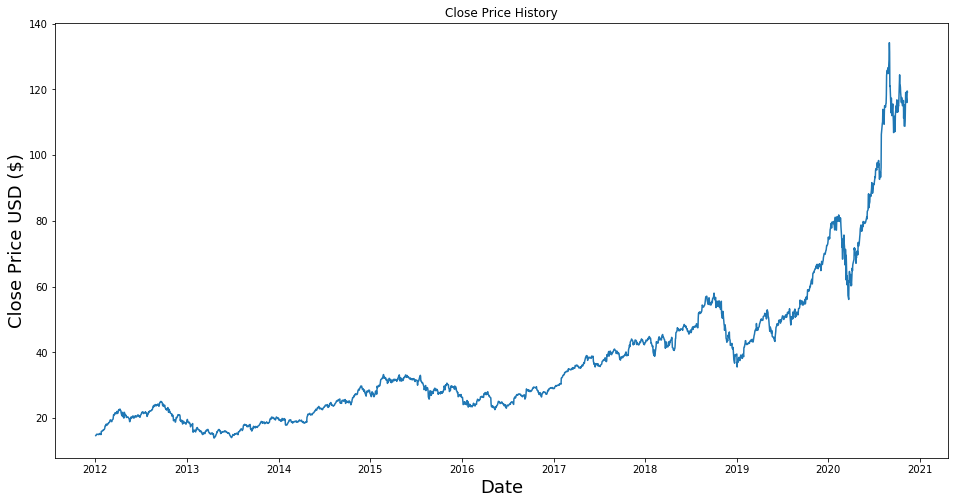

In [24]:
import matplotlib.pyplot as plt
# 종가그래프 plotting하기
# https://dailyheumsi.tistory.com/36
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(apple_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

### DataSet 분리 이유
- 기계학습에서 학습시킨 데이터만을 가지고 테스트를 진행하면 거의 100% 확률로 일치를 할 것입니다. 비유를 하자면 학교에서 시험을 보는데 시험에 나올 문제를 한번씩 풀어보고나서 시험을 같은 문제로 보는거랑 같은겁니다.
- 따라서, 보통 70%정도는 학습에 사용하고 30%는 학습이 완료된 후 검증을 하기 위해 사용합니다.
- 보통은 이렇게 트레이닝셋과 테스트셋으로 구분지어서 사용하지만 경우에 따라서 트레이닝셋을 벨리데이션셋을 추가로 구분지어서 튜닝에 사용하기도 합니다. 

<img src = 'https://mblogthumb-phinf.pstatic.net/MjAxNzA2MjRfNyAg/MDAxNDk4MjgxMzM1ODAz.fgtxu_m0l0Mhm3_1ocVhZZx5Qyac8YYtkliUJ2kMqjEg.0ZW08erRvPBJKw8Z7ugXYEQN4OtWaBJAI-hwonMN8M8g.PNG.wndrlf2003/1.png?type=w2'>

In [25]:
# 새로운 DataFrame을 'Close column만 가져오기
data = apple_df.filter(['Close'])
# data -> np array로 바꾸기
dataset = data.values
# 모델의 train set 만들기
training_data_len = math.ceil(len(dataset) * .8)

# training set 길이
training_data_len

1786

In [26]:
# 데이터를 스케일합니다 (0~1) [sklearn 메써드]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.84854351],
       [0.87782009],
       [0.87549128]])

### 교차 검증 (N-Fold Cross-Validation)
- 데이터가 충분치 않을 경우 80/20으로 나누면 여전히 많은 양의 분산이 발생한다. 이에 대한 한 가지 해결책은 N-Fold 교차 검증을 수행하는 것, 즉 전체 프로세스를 N번 수행하고 모든 수행에서 나온 정확도의 평균을 구하는 방법이다.

- 예를 들어, 10번 교차 검증을 한다고 하면 아래와 같은 그림으로 표현할 수 있다.
<img src = 'https://i1.wp.com/hleecaster.com/wp-content/uploads/2019/12/10fold.jpg?w=748'>
- 당연히 이렇게 구한 **정확도의 평균 값**이 아무래도 모델의 평균 성능을 더 잘 나타낸다고 볼 수 있다.

- 그리고 이걸 일일이 하기 귀찮으니 scikit-learn에서는 아예 이런 기능을 제공하고 있기도 하다.

In [27]:
#Create the training data set
# 스케일된 data set DataFrame 만들기
train_data = scaled_data[0:training_data_len , :] # 1 ~ 1786
# x,y로 나누기
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [28]:
# x_train, y_train를 numpy arrays로 바꾸기
x_train, y_train = np.array(x_train), np.array(y_train)
# data를 reshape 합니다.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1726, 60, 1)

In [29]:
# LSTM model build 하기
# 시계열 모델 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


<img src = 'https://mblogthumb-phinf.pstatic.net/MjAxOTAxMjNfMjU4/MDAxNTQ4MjM1Nzg3NTA2.UtvnGsckZhLHOPPOBWH841IWsZFzNcgwZvYKi2nxImEg.CdtqIxOjWeBo4eNBD2pXu5uwYGa3ZVUr8WZvtldArtYg.PNG.qbxlvnf11/20190123_182720.png?type=w800'>

- keras : <a  https://teddylee777.github.io/tensorflow/LSTM%EC%9C%BC%EB%A1%9C-%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EB%8A%94-%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90-%EC%A3%BC%EA%B0%80>

In [30]:
# model Train하기
model.fit(x_train, y_train, batch_size=1, epochs=1)

1726/1726 [==============================] - 28s 16ms/step - loss: 2.9646e-04


In [32]:
# testing data set 생성
# index가 1786 ~ 2232인 새로운 scaled value로 이루어진 np array 를 만들기
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len: , :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i , 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

3.310848928887748

/Users/kumahoon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


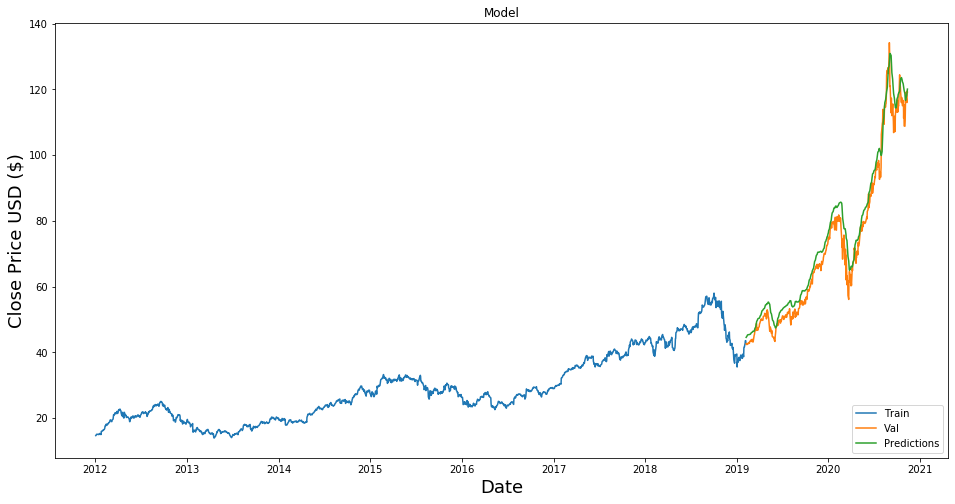

In [40]:
# Data Plot하기
train = data[:training_data_len] # 1 ~ 1785
valid = data[training_data_len:] # 1786 ~ 2232
valid['Predictions'] = predictions
# Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
# plt.plot(predictions.loc['Close']) -> ndarray라서 안됨
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [41]:
# 종가와 예측값 비교하기
valid

,Close,Predictions
Date,,
2019-02-08,42.602501,44.562542
2019-02-11,42.357498,44.893322
2019-02-12,42.722500,45.090458
2019-02-13,42.544998,45.231441
2019-02-14,42.700001,45.309700
...,...,...
2020-11-06,118.690002,117.201569
2020-11-09,116.320000,118.068871
2020-11-10,115.970001,118.782730


## 보완할 점 
- Keras의 시계열 분석에 대해 공부한다. 
- BeautifulSoup 모듈을 통해 다른 주식 Caggle (긁어오기)한다.